**LOAD THE DATASET**

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**ROWS AND COLUMNS**

In [4]:
df.shape

(150, 6)

**DATA TYPES**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**NULL VALUES**

In [6]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**STATISTICAL SUMMARY**

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df=df.drop("Id",axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
X = df.drop("Species", axis=1)
y=df["Species"]
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (150, 4)
Target shape: (150,)


**CONVERT TO THE NUMERICAL VALUES**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


**TRAIN AND TEST SPLITTING**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape)
print("Testing set:",X_test.shape)

Training set: (120, 4)
Testing set: (30, 4)


**TRAIN THE MODEL**

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("MODEL TRAINING COMPLETED")

MODEL TRAINING COMPLETED


**PREDICTIONS**

In [16]:
y_pred = model.predict(X_test)
print("First 10 predictions:", y_pred[:10])
print("First 10 Actual values", y_test[:10])

First 10 predictions: [1 0 2 1 1 0 1 2 1 1]
First 10 Actual values [1 0 2 1 1 0 1 2 1 1]


**ACCURACY**

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


**CONFUSION MATRIX**

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**CLASSIFICATION REPORT**

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**VISUALIZE THE CONFUSION MATRIX**

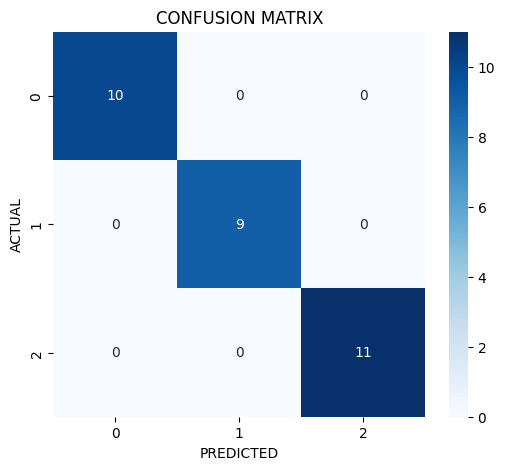

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()

**SAVE THE TRAINED MODEL**

In [21]:
import pickle
with open("iris_model.pkl", "wb") as f:
  pickle.dump(model, f)
print("MODEL SAVED")

MODEL SAVED


**LOAD THE MODEL**

In [22]:
with open("iris_model.pkl", "rb") as f:
   loaded_model = pickle.load(f)
print("MODEL LOADED")

MODEL LOADED


In [23]:
sample_prediction = loaded_model.predict(X_test[:5])
print("Predictions from loaded model:", sample_prediction)

Predictions from loaded model: [1 0 2 1 1]


In [30]:
%%writefile README.md
# 🌸 Iris Classification Project

## 📌 Project Overview
This project builds a Machine Learning classification model to predict the species of iris flowers based on their measurements.

## 📊 Dataset
The dataset contains 150 samples with:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width
- Species (Target)

## 🧠 Model Used
Logistic Regression (Classification)

## 📈 Model Performance
- Accuracy: 100% on test data
- Evaluated using Confusion Matrix and Classification Report

## ⚙️ How to Run
1. Install requirements:
   pip install -r requirements.txt

2. Train model (if training script included)
   python train.py

## 📁 Files Included
- iris.csv (Dataset)
- iris_model.pkl (Saved trained model)
- requirements.txt
- README.md

---

Built as part of ML practice and GitHub portfolio.

Writing README.md
